90000
RAINFOREST_RESIN


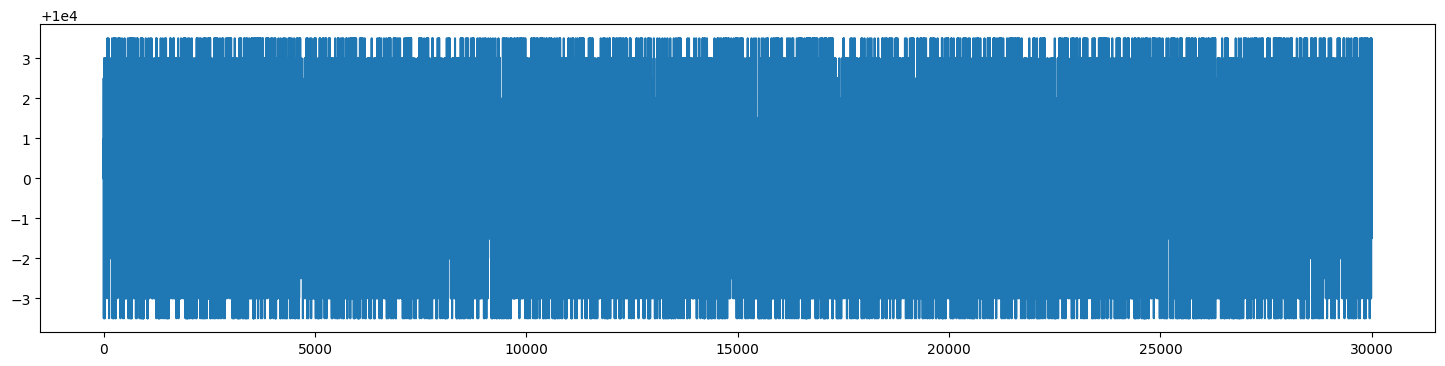

KELP


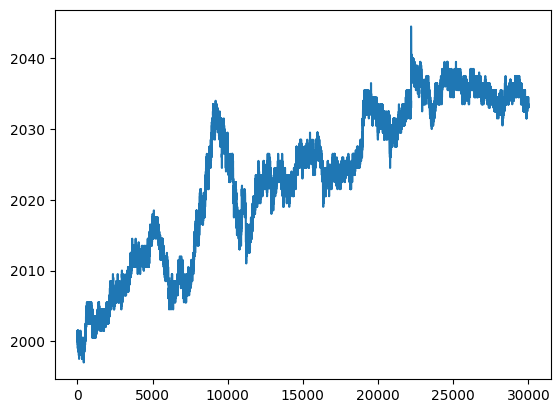

SQUID_INK


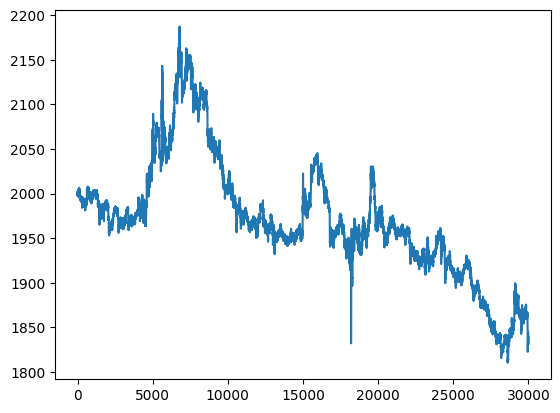

In [6]:
import csv
import matplotlib.pyplot as plt
import numpy as np

def getNumber(val):
    try:
        return float(val)
    except:
        return val

def prefixSum(arr):
    for i in range(1,len(arr)):
        arr[i]+=arr[i-1]
    return arr

def readTradeCSV(filename):
    with open(filename, 'r') as file:
        csvreader = csv.reader(file,delimiter=';')
        header = next(csvreader)
        res = []
        for row in csvreader:
            nrow = [getNumber(val) for val in row]
            res+=[dict(zip(header,nrow))]
        return res

entries = readTradeCSV("Data/round-1-island-data-bottle/prices_round_1_day_-2.csv")
entries += readTradeCSV("Data/round-1-island-data-bottle/prices_round_1_day_-1.csv")
entries += readTradeCSV("Data/round-1-island-data-bottle/prices_round_1_day_0.csv")
print(len(entries))

products = list(set([e['product'] for e in entries]))
groupedEntries = dict(zip(products,[[] for _ in range(len(products))]))
for ent in entries:
    groupedEntries[ent['product']]+=[ent]

def getGroupedProp(name):
    return [np.array([ent[name] for ent in group]) for (_,group) in groupedEntries.items()]

# good_test = [[{k: v for k, v in ent.items() if k not in ['profit_and_loss']} for ent in group] for (_,group) in groupedEntries.items()]

prices = getGroupedProp('mid_price')
plt.figure(figsize=(18,4))

for i in range(len(products)):
    print(products[i])
    plt.plot(prices[i])
    plt.show()

In [67]:
#all data beside our profits is same regardless of our orders
str1 = jsonpickle.encode(good_test)
str2 = jsonpickle.encode(no_test)
str1==str2

True